Verschiedene Ansätze um die Daten zu analysieren.

In [1]:
import numpy as np
import pandas as pd
import scipy
import sys
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# dataset_path = "../data/raw/covid19-dataset/Covid Data.csv"
# df = pd.read_csv(dataset_path)

sys.path.append(os.path.dirname(os.getcwd()))
from src.load_covid19 import load_clean_covid19

df = load_clean_covid19()

df.loc[df.SEX == 'male', 'PREGNANT'] = False

print(df.isna().sum())
bool_columns = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 
                'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OTHER_DISEASE', 'OBESITY', 'TOBACCO', 
                'INTUBED', 'ICU', 'DIED']
for i in bool_columns:
    df[i] = df[i].fillna(False)


Dataset already exists at s:\SynologyDrive\SynologyDrive\Uni\Master 2\3. Semester\Projektpraktikum Web Science\covid-19-risiko-erkennung\src\..\data\raw\covid19-dataset. Skipping download.
Saving clean dataset to: s:\SynologyDrive\SynologyDrive\Uni\Master 2\3. Semester\Projektpraktikum Web Science\covid-19-risiko-erkennung\data\interim\covid-data-clean.csv
Saved
Loading clean dataset from: s:\SynologyDrive\SynologyDrive\Uni\Master 2\3. Semester\Projektpraktikum Web Science\covid-19-risiko-erkennung\data\interim\covid-data-clean.csv
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            30

In [2]:
df.isna().sum()


USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DIED                    0
dtype: int64

In [3]:

df['SEX'] = df['SEX'].replace('female', 0).replace('male', 1)
df['PATIENT_TYPE'] = df['PATIENT_TYPE'].replace('returned home', 0).replace('hospitalization', 1)


df['AT_RISK'] = df['DIED']+df['INTUBED']+df['ICU']


df.AT_RISK = df.AT_RISK.apply(lambda x: 1 if x > 0 else 0) 
df = df.drop(columns = ['DIED', 'INTUBED', 'ICU'])


# train(90%), test(5%)
train, test = train_test_split(df, test_size=0.1, shuffle=True)

# df.to_csv("../data/raw/covid19-dataset/Covid Data2.csv")

train_y = train.AT_RISK.to_numpy()
train_x = train.drop(columns = ['AT_RISK']).to_numpy()


test_y = test.AT_RISK.to_numpy()
test_x = test.drop(columns = ['AT_RISK']).to_numpy()


def get_scores(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    return acc, f1, prec, rec

C:\Users\Rafa\AppData\Local\Temp\ipykernel_33152\1758167921.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['SEX'] = df['SEX'].replace('female', 0).replace('male', 1)
C:\Users\Rafa\AppData\Local\Temp\ipykernel_33152\1758167921.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SEX'] = df['SEX'].replace('female', 0).replace('male', 1)
C:\Users\Rafa\AppData\Local\Temp\ipykernel_33152\1758167921.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace wil

In [4]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
AT_RISK                 0
dtype: int64

KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

ks = [5,7,9]
# ks = [1,3,5,7,9]
accs = []
f1s = []
precs = []
recs = []

for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(train_x, train_y)
    # Scale the features using StandardScaler
    # scaler = StandardScaler()
    # test_x_std = scaler.fit_transform(validation_x)
    # X_test = scaler.transform(X_test)

    y_pred = knn_model.predict(test_x)
    acc, f1, prec, rec = get_scores(test_y, y_pred)
    accs.append(acc)
    f1s.append(f1)
    precs.append(prec)
    recs.append(rec)
    print(f"k: {k} - {acc}")





k: 1 - 0.9249365808998836
k: 3 - 0.9322130881763909
k: 5 - 0.9350454900913616
k: 7 - 0.9364569226954548
k: 9 - 0.9377825249384882


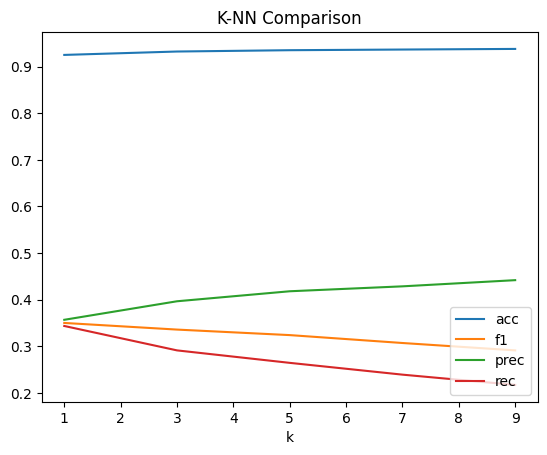

In [7]:
import matplotlib.pyplot as plt

plt.title('K-NN Comparison')
plt.errorbar(ks, accs, label="acc")
plt.errorbar(ks, f1s, label="f1")
plt.errorbar(ks, precs, label="prec")
plt.errorbar(ks, recs, label="rec")
plt.legend(loc ='lower right')
plt.xlabel('k')
plt.show()

Decision Tree

In [8]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

train_y = train.AT_RISK.to_numpy()
train_x = train.drop(columns = ['AT_RISK']).to_numpy()

heuristics = ["entropy", "gini"]
splitters = ["best", "random"]
max_depth = [3, 5, 7, 11, 13, 17, 19]
dt_fmeasures = {}
dt_best_result = 0
dt_best = None

for d in max_depth:
    dt_fmeasures[d] = np.zeros(len(heuristics)*len(splitters))
    i=0
    for heuristic, splitter in [(heuristic, splitter) for heuristic in heuristics for splitter in splitters]:
        # create a Decision Tree classifier instance and compute the prediction
        dt_classifier = DecisionTreeClassifier(criterion=heuristic, splitter=splitter, max_depth=d, class_weight='balanced')
        dt_classifier.fit(train_x, train_y)
        y_pred = dt_classifier.predict(test_x)

        # calculate F-measures and save best model
        acc, f1, prec, rec = get_scores(test_y, y_pred)
        dt_fmeasures[d][i] = acc
        print(f"{d}:{heuristic} {splitter}: f1: {f1}")
        i=i+1

        if f1 > dt_best_result:
            dt_best_result = f1
            dt_best = dt_classifier




3:entropy best: f1: 0.4432204642909951
3:entropy random: f1: 0.44633807575359435
3:gini best: f1: 0.4432204642909951
3:gini random: f1: 0.43774631440665596
5:entropy best: f1: 0.44434547006643654
5:entropy random: f1: 0.4483303249097473
5:gini best: f1: 0.44019489321170824
5:gini random: f1: 0.44451861741581367
7:entropy best: f1: 0.45379751656890377
7:entropy random: f1: 0.44385185185185183
7:gini best: f1: 0.4553492822966507
7:gini random: f1: 0.44447737967320017
11:entropy best: f1: 0.45624279677295426
11:entropy random: f1: 0.45558982266769465
11:gini best: f1: 0.4549290372075182
11:gini random: f1: 0.45197611168169194
13:entropy best: f1: 0.4595901993943446
13:entropy random: f1: 0.4594051605278708
13:gini best: f1: 0.4584594817756458
13:gini random: f1: 0.45931996375241324
17:entropy best: f1: 0.4576137167589163
17:entropy random: f1: 0.4549433468319221
17:gini best: f1: 0.4541248072033015
17:gini random: f1: 0.452885555917835
19:entropy best: f1: 0.4544547150978605
19:entropy ra

0.4595901993943446


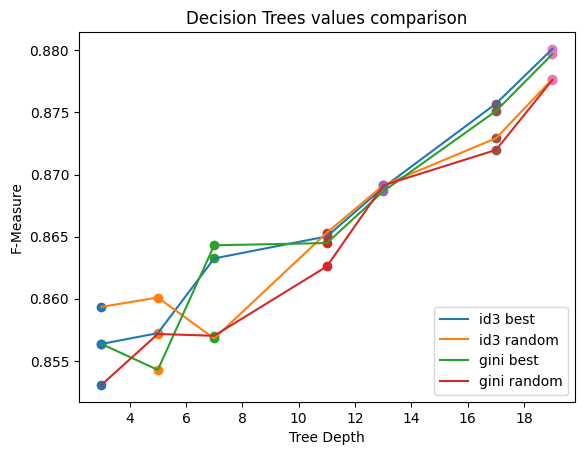

In [9]:
print(dt_best_result)



l1, l2, l3, l4 = [], [], [], []
for k in dt_fmeasures.keys():
    fmeasures = dt_fmeasures[k]
    plt.scatter([k] * len(fmeasures), fmeasures)
    l1.append(dt_fmeasures[k][0])
    l2.append(dt_fmeasures[k][1])
    l3.append(dt_fmeasures[k][2])
    l4.append(dt_fmeasures[k][3])

plt.errorbar(max_depth, l1, label ='id3 best')
plt.errorbar(max_depth, l2, label ='id3 random')
plt.errorbar(max_depth, l3, label ='gini best')
plt.errorbar(max_depth, l4, label ='gini random')
plt.legend(loc ='lower right')
plt.title('Decision Trees values comparison')
plt.xlabel('Tree Depth')
plt.ylabel('F-Measure')
plt.show()

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dt_classifier,
#                 #    feature_names=iris.feature_names,
#                 #    class_names=iris.target_names,
#                    filled=True)


SVM

linear:0.4559710494571773
poly:0.47601476014760147
rbf:0.44954491491887616


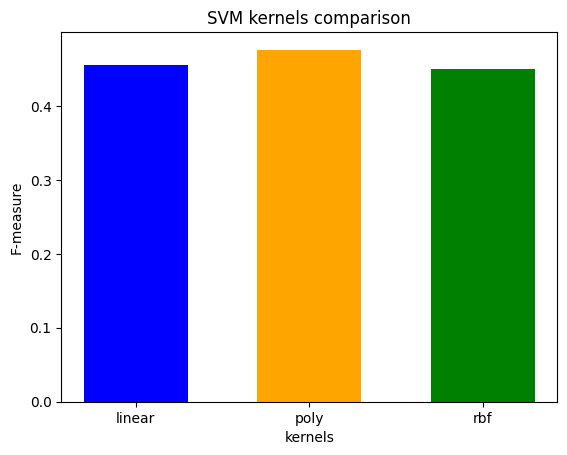

In [7]:
from sklearn.svm import SVC



# undersampling the train set
undersampling = 10000
train_xus = train_x[:undersampling]
train_yus = train_y[:undersampling]
test_xus = test_x[:undersampling]
test_yus = test_y[:undersampling]


kernels = ["linear", "poly", "rbf"]
svm_fmeasures = {}
svm_best_result = 0

for kernel in kernels:
    # create a SVM classifier instance and compute the prediction
    svm_classifier = SVC(kernel=kernel, degree=8, class_weight='balanced')
    svm_classifier.fit(train_xus, train_yus)
    y_pred = svm_classifier.predict(test_xus)

    # calculate F-measures and save best model
    acc, f1, prec, rec = get_scores(test_yus, y_pred)
    svm_fmeasures[kernel] = f1
    print(f"{kernel}:{f1}")
    if svm_fmeasures[kernel] > svm_best_result:
        svm_best_result = svm_fmeasures[kernel]
        svm_best_model = svm_classifier
    


plt.bar(svm_fmeasures.keys(), svm_fmeasures.values(), color=['blue', 'orange', 'green', 'red'], width=.6)
plt.title('SVM kernels comparison')
plt.xlabel('kernels')
plt.ylabel('F-measure')
plt.show()


Random Forrest

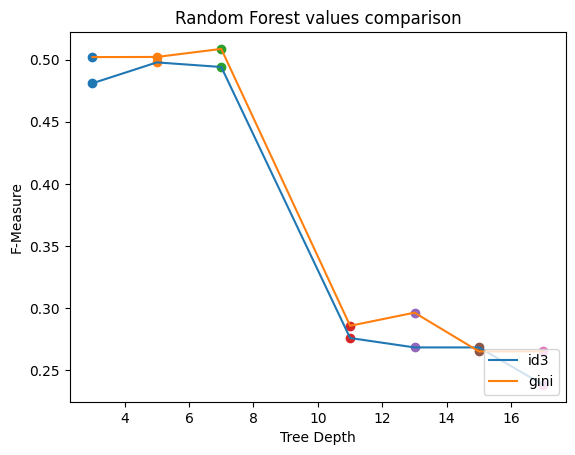

In [14]:
from sklearn.ensemble import RandomForestClassifier



# undersampling the train set
undersampling = 1000
train_xus = train_x[:undersampling]
train_yus = train_y[:undersampling]
test_xus = test_x[:undersampling]
test_yus = test_y[:undersampling]

# set Random Forest parameters
heuristics = ["entropy", "gini"]
max_depth = [3, 5, 7, 11, 13, 15, 17]
rf_fmeasures = {}
rf_best_result = 0
for j in range(5):
    for d in max_depth:
        rf_fmeasures[d] = np.zeros(len(heuristics))
        for (i, heuristic) in enumerate(heuristics):
            # create a Random Forest classifier instance and compute the prediction
            rf_classifier = RandomForestClassifier(n_estimators=100, criterion=heuristic, max_depth=d, class_weight='balanced')
            rf_classifier.fit(train_xus, train_yus)
            y_pred = rf_classifier.predict(test_xus)

            # calculate F-measures and save best model
            acc, f1, prec, rec = get_scores(test_yus, y_pred)
            rf_fmeasures[d][i] = f1
            if rf_fmeasures[d][i] > rf_best_result:
                rf_best_result = rf_fmeasures[d][i]
                rf_best_model = rf_classifier   
     

# plot the results
l1, l2 = [], []
for k in rf_fmeasures.keys():
    fmeasures = rf_fmeasures[k]
    plt.scatter([k] * len(fmeasures), fmeasures)
    l1.append(rf_fmeasures[k][0])
    l2.append(rf_fmeasures[k][1])

# create line for each  models
plt.errorbar(max_depth, l1, label ='id3')
plt.errorbar(max_depth, l2, label ='gini')
plt.legend(loc ='lower right')
plt.title('Random Forest values comparison')
plt.xlabel('Tree Depth')
plt.ylabel('F-Measure')
plt.show()